# Perceptron0

## Neural Networks

Neural Networks are a machine learning framework that attempts to mimic the learning pattern of natural biological neural networks: you can think of them as a crude approximation of what we assume the human mind is doing when it is learning. Biological neural networks have interconnected neurons with dendrites that receive inputs, then based on these inputs they produce an output signal through an axon to another neuron. We will try to mimic this process through the use of Artificial Neural Networks (ANN), which we will just refer to as neural networks from now on. Neural networks are the foundation of deep learning, a subset of machine learning that is responsible for some of the most exciting technological advances today! The process of creating a neural network in Python begins with the most basic form, a single perceptron. Let’s start by explaining the single perceptron!

## The Perceptron

Let’s start our discussion by talking about the Perceptron! A perceptron has one or more inputs, a bias, an activation function, and a single output. The perceptron receives inputs, multiplies them by some weight, and then passes them into an activation function to produce an output. There are many possible activation functions to choose from, such as the logistic function, a trigonometric function, a step function etc. We must also make sure to add a bias to the perceptron, a constant weight outside of the inputs that allows us to achieve better fit for our predictive models. Check out the diagram below for a visualization of a perceptron:

![Perceptron](Perceptron-small.png)

Perceptron formula: $Out = AF(\sum (x * w) + Bias)$, where vector $x = (x1,x2,...,xn)$ and vector $w = (w1,w2,...,wn)$
    
    

A perceptron is a building block that can be used to do simple binary classifications: only 2 classes. The preceptron 
is used in 2 modi: train or inference. In train mode the perceptron is given input data as well as the desired outcome.
It will first predict the outcome $Out$ abd then compare its prediction with the desired outcome. It will then 
correct the weights $w$ a bit. Then the next input is presented to the perceptron together with its desired outcome
and again the perceptron will adapt the weights. After all inputs are done then the perceptron will still not be 
able to do a fault free prediction. It will take up to 100 epochs (cycles) before the perceptron will predict the 
outcome $Out$ in an acceptable way. 

We start with setting up the necessary libraries. Subsequently we will:
1. set up the input data together with its category labels
2. plot the input data set and colour the set according to its label (0$\rightarrow$red or 1$\rightarrow$blue)
3. train the perceptron after tidying the structure of the data
4. plot the separation line between the 2 classes.

In [1]:
import numpy as numpy
import matplotlib.pyplot as matplotlib
#import sklearn.linear_model.perceptron as p
from sklearn.linear_model import perceptron
 
# Needed to show the plots inline
%matplotlib inline

Get the data:

In [2]:
# Data
data = numpy.array([
    [2, 1, 2, 5, 7, 2, 3, 6, 1, 2, 5, 4, 6, 5],
    [2, 3, 3, 3, 3, 4, 4, 4, 5, 5, 5, 6, 6, 7]
])
 
# Labels
labels = numpy.array([0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1])

Plot points

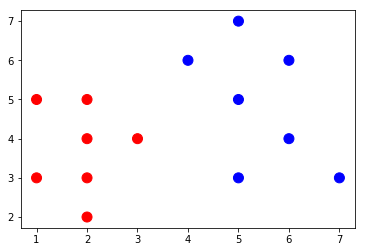

In [3]:
colormap = numpy.array(['r', 'b'])
# r = 0, b = 1

#2,2 = red
#1,3 = red
#2,3 = red
#5,3 = blue

matplotlib.scatter(data[0], data[1], c=colormap[labels], s=100)

#help(matplotlib.scatter)

In [14]:
# rotate the data 270 degrees
data90degrees = numpy.rot90(data)
data180degrees = numpy.rot90(data90degrees)
data270degrees = numpy.rot90(data180degrees)

#help(numpy.rot90)
 
# Create the model

help(perceptron.Perceptron)

net = perceptron.Perceptron(n_iter=100, verbose=0, random_state=None, fit_intercept=True, eta0=0.002)
net.fit(data270degrees,labels)
 
# Print the results
print ("Prediction " + str(net.predict(data270degrees)))
print ("Actual     " + str(labels))
print ("Accuracy   " + str(net.score(data270degrees, labels)*100) + "%")
data270degrees

Help on class Perceptron in module sklearn.linear_model.perceptron:

class Perceptron(sklearn.linear_model.stochastic_gradient.BaseSGDClassifier)
 |  Perceptron(penalty=None, alpha=0.0001, fit_intercept=True, max_iter=None, tol=None, shuffle=True, verbose=0, eta0=1.0, n_jobs=None, random_state=0, early_stopping=False, validation_fraction=0.1, n_iter_no_change=5, class_weight=None, warm_start=False, n_iter=None)
 |  
 |  Perceptron
 |  
 |  Read more in the :ref:`User Guide <perceptron>`.
 |  
 |  Parameters
 |  ----------
 |  
 |  penalty : None, 'l2' or 'l1' or 'elasticnet'
 |      The penalty (aka regularization term) to be used. Defaults to None.
 |  
 |  alpha : float
 |      Constant that multiplies the regularization term if regularization is
 |      used. Defaults to 0.0001
 |  
 |  fit_intercept : bool
 |      Whether the intercept should be estimated or not. If False, the
 |      data is assumed to be already centered. Defaults to True.
 |  
 |  max_iter : int, optional
 |    

/home/bas/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:152: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


array([[2, 2],
       [3, 1],
       [3, 2],
       [3, 5],
       [3, 7],
       [4, 2],
       [4, 3],
       [4, 6],
       [5, 1],
       [5, 2],
       [5, 5],
       [6, 4],
       [6, 6],
       [7, 5]])

Coefficient 0 -0.014
Coefficient 1 0.032
Bias [-0.04]


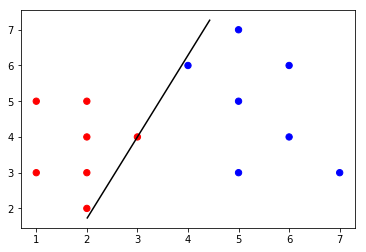

In [11]:
# Plot the original data
plt.scatter(d[0], d[1], c=colormap[t], s=40)
 
# Output the values
print "Coefficient 0 " + str(net.coef_[0,0])
print "Coefficient 1 " + str(net.coef_[0,1])
print "Bias " + str(net.intercept_)
 
# Calc the hyperplane (decision boundary)
ymin, ymax = plt.ylim()
w = net.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(ymin, ymax)
yy = a * xx - (net.intercept_[0]) / w[1]
 
# Plot the line
plt.plot(yy,xx, 'k-')

Now we will interogate the perceptron with new input data. We would like to know to which class (4,2) and (3,5) belong.
Since (3,3) will even be more critical we will test this also. 

So our test vector is:

In [12]:
test = np.array([
[4, 3, 3],
[2, 5, 3]
])


We expect the perceptron to return [1,0,1] for blue, red, blue

In [13]:
#Print the results after tidying the input
t90 = np.rot90(test)
t180 = np.rot90(t90)
t270 = np.rot90(t180)
print "Prediction " + str(net.predict(t270))

Prediction [1 0 1]
